In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

### Reading Credit Card Approval Data from CSV

In [2]:
df = pd.read_csv("data\credit_card_approval.csv")
display(df.head())

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


### Data Diagnostics

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

There are **537,667 entries** and **19 features**

### Dataframe sparsity

<AxesSubplot: >

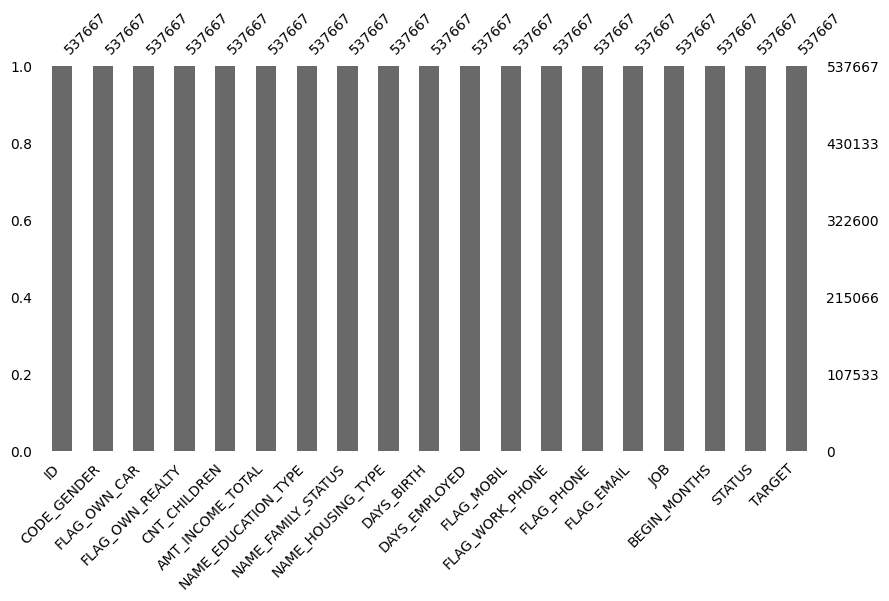

In [137]:
msno.bar(df,
         figsize=(10,5),
         fontsize=10)

There are **NO** empty/null values in this dataset

### Unique values in each column (non-numerical)

In [138]:
def get_unique_count(df, column):
    count = len(df[column].unique())
    return count

column_count_dict = {}

for column in df.columns:
    column_count = get_unique_count(df, column)
    column_count_dict[column] = column_count
    
column_count_df = pd.Series(column_count_dict).to_frame("unique_count")
column_count_df

,unique_count
ID,25134
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
CNT_CHILDREN,3
AMT_INCOME_TOTAL,195
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,5
NAME_HOUSING_TYPE,6
DAYS_BIRTH,5206


In [139]:
unique_dict = {}

object_only_df = df.loc[:, df.dtypes == "object"]

for column in object_only_df.columns:
    unique_values = df[column].unique()
    unique_dict[column] = unique_values
    
unique_dict

{'CODE_GENDER': array(['F', 'M'], dtype=object),
 'FLAG_OWN_CAR': array(['Y', 'N'], dtype=object),
 'FLAG_OWN_REALTY': array(['N', 'Y'], dtype=object),
 'CNT_CHILDREN': array(['2+ children', 'No children', '1 children'], dtype=object),
 'NAME_EDUCATION_TYPE': array(['Secondary / secondary special', 'Higher education',
        'Incomplete higher', 'Lower secondary', 'Academic degree'],
       dtype=object),
 'NAME_FAMILY_STATUS': array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
        'Widow'], dtype=object),
 'NAME_HOUSING_TYPE': array(['With parents', 'House / apartment', 'Rented apartment',
        'Municipal apartment', 'Co-op apartment', 'Office apartment'],
       dtype=object),
 'JOB': array(['Managers', 'Private service staff', 'Laborers', 'Core staff',
        'Drivers', 'High skill tech staff', 'Realty agents', 'Secretaries',
        'Accountants', 'Sales staff', 'Medicine staff',
        'Waiters/barmen staff', 'Low-skill Laborers', 'Cleaning staff',


### Duplicate entries

In [140]:
total_entries = df.shape[0]
duplicated_entries_count = df.duplicated().sum()
duplicated_entries_proportion = (duplicated_entries_count / total_entries) * 100

print(f"There are {duplicated_entries_count} duplicated entries ({duplicated_entries_proportion}%)")

There are 0 duplicated entries (0.0%)


In [141]:
duplicated_ID_count = df.ID.duplicated().sum()
duplicated_ID_proportion = (duplicated_ID_count / total_entries) * 100

print(f"There are {duplicated_ID_count} duplicated entries ({duplicated_ID_proportion}%)")

There are 512533 duplicated entries (95.32535937671457%)


There are a number of clients that frequent this establishment that's why 95% of the transactions here are from the same individuals (i.e., customers). 

## Data Cleaning
1. Reset column names to lowercases.
2. Remap binary categories from Y/N to actual boolean values.
3. Remap TARGET values.
4. Reset columns with object dtypes to category (if applicable).
5. Transform DAYS_BIRTH column to age.

### Reset column names to lowercase

In [142]:
df.columns = df.columns.str.lower()
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,job,begin_months,status,target
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


### Remap binary categories from Y/N or 0/1 to actual boolean values

In [143]:
df["flag_own_car"] = df["flag_own_car"] == "Y"
df["flag_own_realty"] = df["flag_own_realty"] == "Y"
df["flag_mobil"] = df["flag_mobil"] == 1
df["flag_work_phone"] = df["flag_work_phone"] == 1
df["flag_phone"] = df["flag_phone"] == 1
df["flag_email"] = df["flag_email"] == 1
df

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,job,begin_months,status,target
0,5065438,F,True,False,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,True,False,False,False,Managers,-6,C,0
1,5142753,F,False,False,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,True,True,True,False,Private service staff,-4,0,0
2,5111146,M,True,True,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,True,False,True,False,Laborers,0,C,0
3,5010310,F,True,True,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,True,False,False,False,Core staff,-3,0,0
4,5010835,M,True,True,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,True,True,False,False,Drivers,-29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,True,False,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,True,False,True,False,Core staff,-8,0,0
537663,5010773,F,False,True,No children,135000.0,Higher education,Married,With parents,-14160,-4635,True,False,False,False,Sales staff,-8,0,0
537664,5105601,M,False,True,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,True,False,False,False,Private service staff,-7,0,0
537665,5132833,M,True,False,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,True,False,True,False,Laborers,-1,0,0


### Remap TARGET values

In [144]:
df["target"] = df["target"].map({0: "nonrisk user", 1: "risk user"}) 
df

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,job,begin_months,status,target
0,5065438,F,True,False,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,True,False,False,False,Managers,-6,C,nonrisk user
1,5142753,F,False,False,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,True,True,True,False,Private service staff,-4,0,nonrisk user
2,5111146,M,True,True,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,True,False,True,False,Laborers,0,C,nonrisk user
3,5010310,F,True,True,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,True,False,False,False,Core staff,-3,0,nonrisk user
4,5010835,M,True,True,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,True,True,False,False,Drivers,-29,0,nonrisk user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,True,False,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,True,False,True,False,Core staff,-8,0,nonrisk user
537663,5010773,F,False,True,No children,135000.0,Higher education,Married,With parents,-14160,-4635,True,False,False,False,Sales staff,-8,0,nonrisk user
537664,5105601,M,False,True,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,True,False,False,False,Private service staff,-7,0,nonrisk user
537665,5132833,M,True,False,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,True,False,True,False,Laborers,-1,0,nonrisk user


### Reset columns with object dtypes to category (if applicable)

In [145]:
df.loc[:, df.dtypes == "object"] = df.loc[:, df.dtypes == "object"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   537667 non-null  int64   
 1   code_gender          537667 non-null  category
 2   flag_own_car         537667 non-null  bool    
 3   flag_own_realty      537667 non-null  bool    
 4   cnt_children         537667 non-null  category
 5   amt_income_total     537667 non-null  float64 
 6   name_education_type  537667 non-null  category
 7   name_family_status   537667 non-null  category
 8   name_housing_type    537667 non-null  category
 9   days_birth           537667 non-null  int64   
 10  days_employed        537667 non-null  int64   
 11  flag_mobil           537667 non-null  bool    
 12  flag_work_phone      537667 non-null  bool    
 13  flag_phone           537667 non-null  bool    
 14  flag_email           537667 non-null  bool    
 15  

C:\Users\Chavez\AppData\Local\Temp\ipykernel_17232\2095253014.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.dtypes == "object"] = df.loc[:, df.dtypes == "object"].astype("category")


### Transform DAYS_BIRTH column to age

In [146]:
df["age"] = df["days_birth"].abs() // 365
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,job,begin_months,status,target,age
0,5065438,F,True,False,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,True,False,False,False,Managers,-6,C,nonrisk user,36
1,5142753,F,False,False,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,True,True,True,False,Private service staff,-4,0,nonrisk user,48
2,5111146,M,True,True,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,True,False,True,False,Laborers,0,C,nonrisk user,53
3,5010310,F,True,True,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,True,False,False,False,Core staff,-3,0,nonrisk user,41
4,5010835,M,True,True,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,True,True,False,False,Drivers,-29,0,nonrisk user,47


### Summary of Cleaning

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   537667 non-null  int64   
 1   code_gender          537667 non-null  category
 2   flag_own_car         537667 non-null  bool    
 3   flag_own_realty      537667 non-null  bool    
 4   cnt_children         537667 non-null  category
 5   amt_income_total     537667 non-null  float64 
 6   name_education_type  537667 non-null  category
 7   name_family_status   537667 non-null  category
 8   name_housing_type    537667 non-null  category
 9   days_birth           537667 non-null  int64   
 10  days_employed        537667 non-null  int64   
 11  flag_mobil           537667 non-null  bool    
 12  flag_work_phone      537667 non-null  bool    
 13  flag_phone           537667 non-null  bool    
 14  flag_email           537667 non-null  bool    
 15  

In [151]:
df.sample(15)

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,job,begin_months,status,target,age
47725,5092201,M,True,True,No children,180000.0,Higher education,Married,House / apartment,-11993,-4826,True,False,True,False,Laborers,0,X,nonrisk user,32
188437,5022325,M,True,True,No children,256500.0,Higher education,Married,House / apartment,-21503,-1674,True,False,False,True,Core staff,-26,X,nonrisk user,58
319011,5099743,F,False,True,No children,202500.0,Secondary / secondary special,Separated,House / apartment,-18939,-12179,True,False,False,False,Laborers,-7,X,nonrisk user,51
58787,5105968,F,True,False,1 children,225000.0,Higher education,Civil marriage,With parents,-9932,-668,True,False,True,True,Accountants,-36,X,nonrisk user,27
24593,5100372,F,False,True,No children,225000.0,Secondary / secondary special,Married,House / apartment,-18624,-2348,True,False,False,False,Laborers,-34,C,nonrisk user,51
445731,5113338,F,False,True,No children,126000.0,Secondary / secondary special,Married,House / apartment,-14813,-2567,True,False,False,True,Accountants,-2,0,nonrisk user,40
525305,5114002,F,False,False,2+ children,202500.0,Secondary / secondary special,Married,House / apartment,-13446,-2720,True,False,False,False,Sales staff,-39,X,nonrisk user,36
363956,5021552,F,False,True,No children,202500.0,Secondary / secondary special,Married,House / apartment,-20870,-1583,True,False,False,False,Medicine staff,-17,0,nonrisk user,57
411726,5095303,F,True,True,No children,225000.0,Higher education,Married,House / apartment,-12322,-3717,True,False,False,False,Core staff,-29,0,nonrisk user,33
90296,5115637,M,True,True,No children,382500.0,Higher education,Separated,House / apartment,-14806,-710,True,True,True,False,Managers,-35,0,nonrisk user,40


## Exploratory Data Analysis